# Zoom in on Raman Wings from IR Source C

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpdaf.obj import Cube
sns.set_context("talk")

## Choosing the data set

Previously I had been using the combined data cube of several observations.  Now I have downloaded some of the individual cubes to see if they are better.  But I don't remember which is which. 

I will load both and have a look at them.

In [2]:
datapath = Path("/Users/will/Work/Muse-Hii-Data/SMC-NGC-346/")
file1 = "ADP.2016-10-07T08_50_28.141.fits"
file2 = "ADP.2016-10-12T05_43_23.882.fits"
cube1 = Cube(str(datapath / file1))
cube2 = Cube(str(datapath / file2))

In [3]:
savepath = Path("../data")

Take a broad wavelength band around Ha

In [4]:
hacube1 = cube1.select_lambda(6200, 6800)
hacube2 = cube2.select_lambda(6200, 6800)

And plot them both, summed over wavelength:

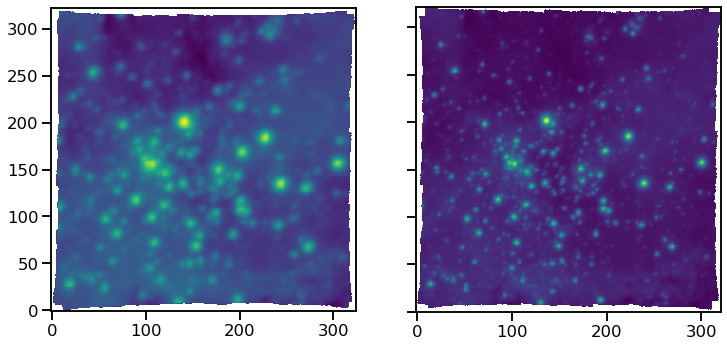

In [7]:
fig, [ax1, ax2] = plt.subplots(
    1, 2, 
    sharey=True, 
    figsize=(12,6)
)
hacube1.sum(axis=0).plot(scale="log", ax=ax1)
hacube2.sum(axis=0).plot(scale="log", ax=ax2);

Clearly, the second one has much better seeing.

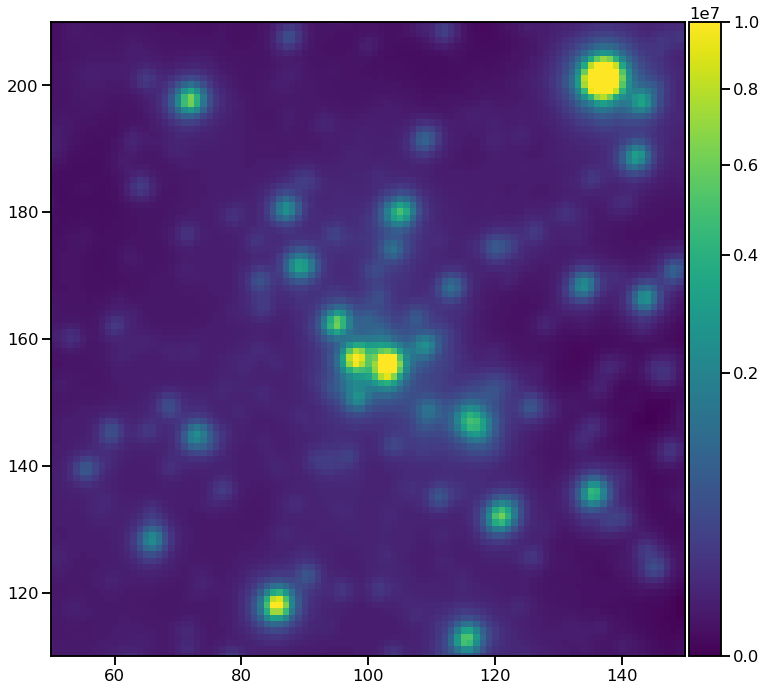

In [31]:
fig, ax = plt.subplots(
    1, 1, 
    sharey=True, 
    figsize=(12, 12)
)
hacube2.sum(axis=0).plot(
    scale="sqrt", 
    colorbar="v",
    vmax=1.e7,
    vmin=0.0,
)
ax.set(
    xlim=[50, 150],
    ylim=[110, 210],
);

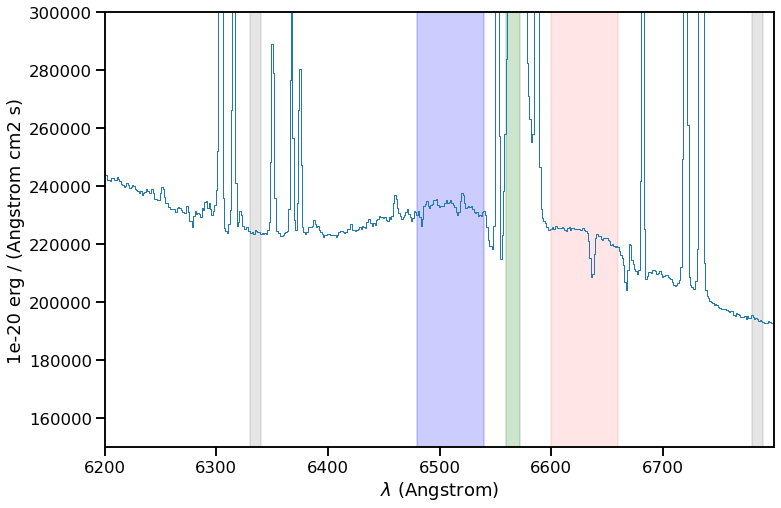

In [44]:
fig, ax = plt.subplots(
    1, 1, 
    figsize=(12, 8)
)
hacube2[:, 140:155, 110:125].sum(axis=(1, 2)).plot()
# Continuum bands
ax.axvspan(6330, 6340, alpha=0.1, color="k")
ax.axvspan(6780, 6790, alpha=0.1, color="k")

# Raman bands
ax.axvspan(6480, 6540, alpha=0.2, color="b")
ax.axvspan(6600, 6660, alpha=0.1, color="r")

# Ha core
ax.axvspan(6560.0, 6572.0, alpha=0.2, color="g")



ax.set(
    yscale="linear",
    ylim=[1.5e5, 3e5],
);

In [45]:
cont_b = cube2.select_lambda(6330, 6340).mean(axis=0)
cont_r = cube2.select_lambda(6780, 6790).mean(axis=0)
cont = 0.5*(cont_b + cont_r)

raman_b = (
    cube2.select_lambda(6480, 6540)
    - cont
).mean(axis=0)
raman_r = (
    cube2.select_lambda(6600, 6660)
    - cont
).mean(axis=0)

core_ha = (
    cube2.select_lambda(6560.0, 6572.0)
    - cont
).sum(axis=0)

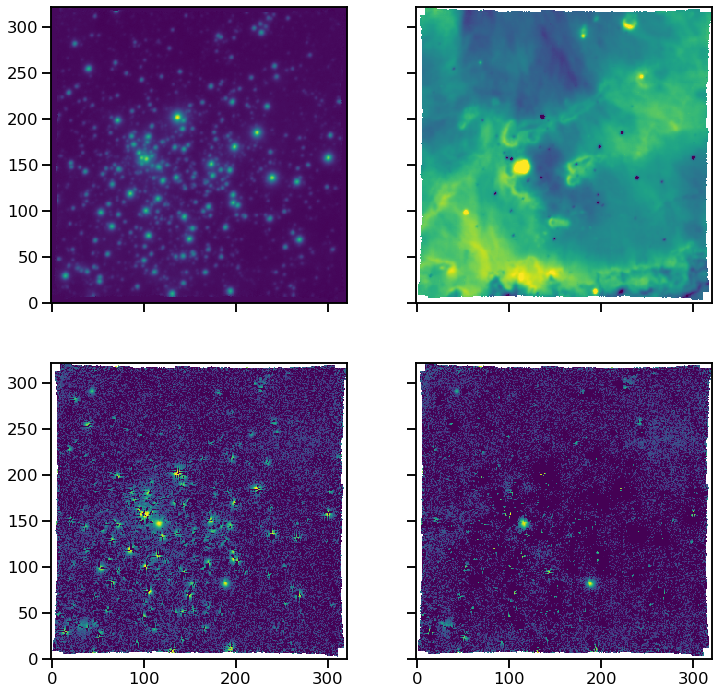

In [57]:
fig, axes = plt.subplots(
    2, 2, 
    sharex=True,
    sharey=True, 
    figsize=(12,12)
)
cont.plot(
    scale="log", 
#    colorbar="v",
    ax=axes[0, 0],
)
core_ha.plot(
    scale="sqrt", 
    vmin=-2e4,
    vmax=1e5,
    ax=axes[0, 1],
#    colorbar="v",
)
raman_b.plot(
    scale="log", 
    ax=axes[1, 0],
    vmin=0.0,
    vmax=1000.0,
#    colorbar="v",
)
raman_r.plot(
    scale="log", 
    ax=axes[1, 1],
    vmin=0.0,
    vmax=1000.0,    
#    colorbar="v",
)



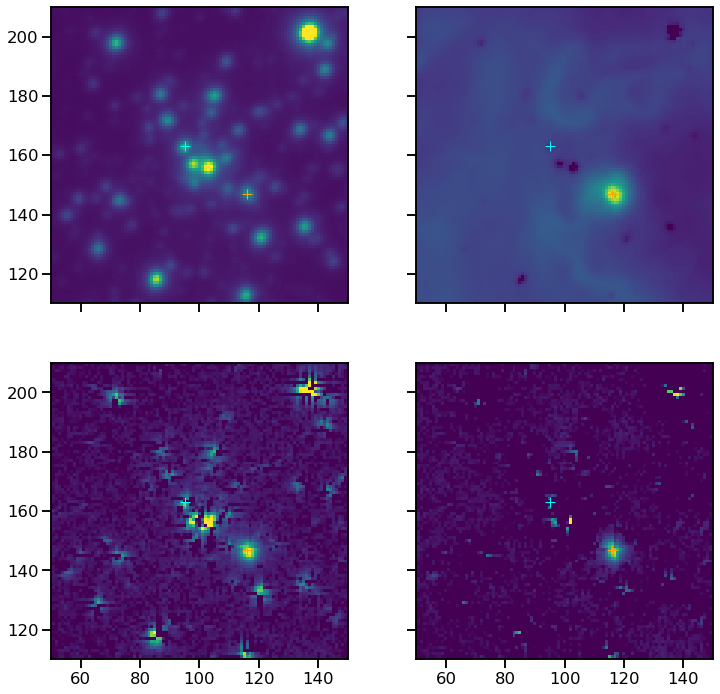

In [137]:
fig, axes = plt.subplots(
    2, 2, 
    sharex=True,
    sharey=True, 
    figsize=(12,12)
)
cont.plot(
    scale="sqrt", 
#    colorbar="v",
    vmax=3e4,
    ax=axes[0, 0],
)
core_ha.plot(
    scale="sqrt", 
    vmin=-2e4,
    vmax=10e5,
    ax=axes[0, 1],
#    colorbar="v",
)
raman_b.plot(
    scale="sqrt", 
    ax=axes[1, 0],
    vmin=0.0,
    vmax=1000.0,
#    colorbar="v",
)
raman_r.plot(
    scale="sqrt", 
    ax=axes[1, 1],
    vmin=0.0,
    vmax=1000.0,    
#    colorbar="v",
)

# Position of mYSO
x, y = 116, 147
# position ov B star
xb, yb = 95, 163

for ax in axes.flat:
    ax.scatter(x, y, s=100, marker="+", color="orange", linewidth=1)
    ax.scatter(xb, yb, s=100, marker="+", color="cyan", linewidth=1)


axes[0, 0].set(
    xlim=[50, 150],
    ylim=[110, 210],
);


In [138]:
m = 2
spec_ne = cube2[:, y:y+m, x-m:x].mean(axis=(1, 2))
spec_nw = cube2[:, y:y+m, x:x+m].mean(axis=(1, 2))
spec_se = cube2[:, y-m:y, x-m:x].mean(axis=(1, 2))
spec_sw = cube2[:, y-m:y, x:x+m].mean(axis=(1, 2))

spec_out = (
    cube2[:, y-2*m:y+2*m, x-2*m:x+2*m].sum(axis=(1, 2))
    - m**2 * (spec_ne + spec_nw + spec_se + spec_sw)
) / (16*m**2 - 4*m**2)

spec_b_ne = cube2[:, yb:yb+m, xb-m:xb].mean(axis=(1, 2))
spec_b_nw = cube2[:, yb:yb+m, xb:xb+m].mean(axis=(1, 2))
spec_b_se = cube2[:, yb-m:yb, xb-m:xb].mean(axis=(1, 2))
spec_b_sw = cube2[:, yb-m:yb, xb:xb+m].mean(axis=(1, 2))

spec_b_out = (
    cube2[:, yb-2*m:yb+2*m, xb-2*m:xb+2*m].sum(axis=(1, 2))
    - m**2 * (spec_b_ne + spec_b_nw + spec_b_se + spec_b_sw)
) / (16*m**2 - 4*m**2)



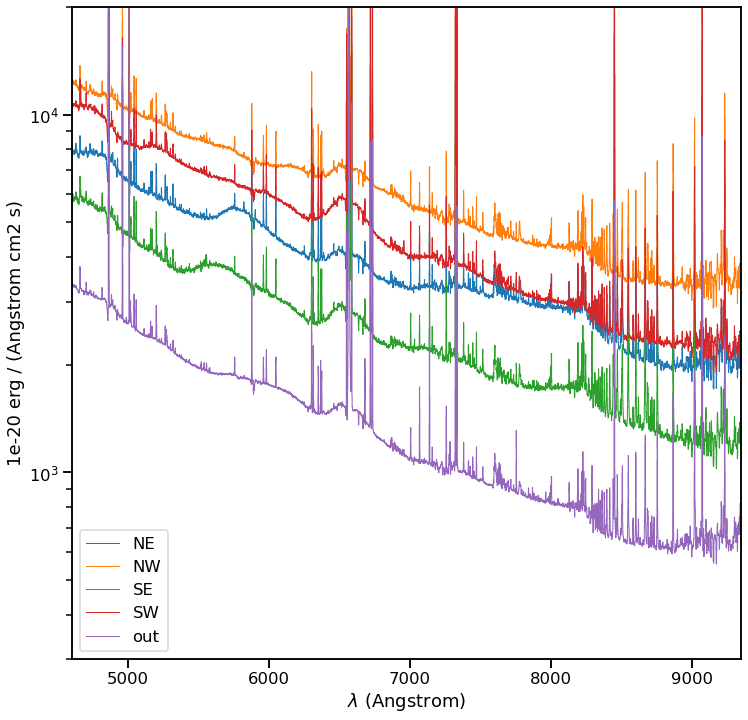

In [139]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_ne.plot(label="NE")
spec_nw.plot(label="NW")
spec_se.plot(label="SE")
spec_sw.plot(label="SW")
spec_out.plot(label="out")

ax.legend()
ax.set(
    yscale="log",
    ylim=[300, 2e4],
);

The SW sample has clearly got the most raman.

But what are the strange bumps at around 5900 Å?

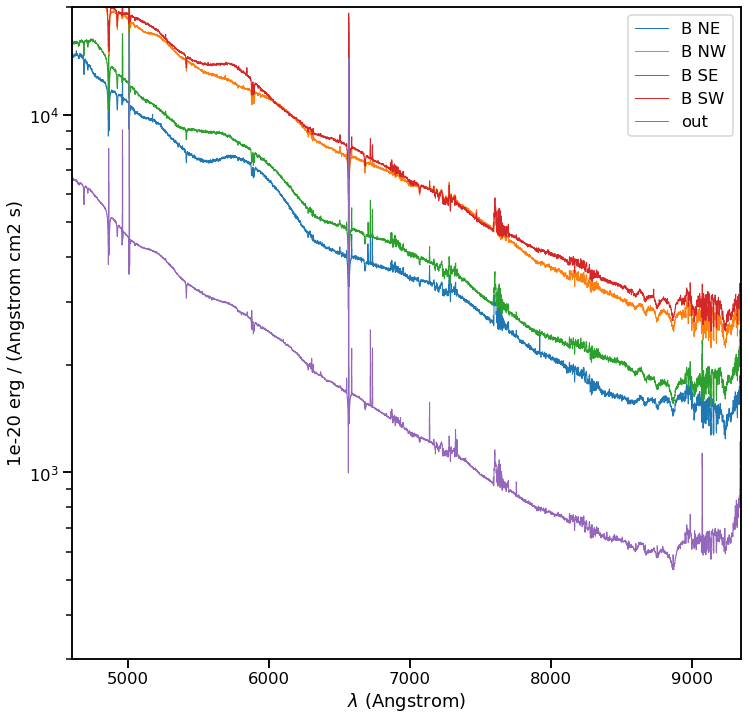

In [141]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_b_ne.plot(label="B NE")
spec_b_nw.plot(label="B NW")
spec_b_se.plot(label="B SE")
spec_b_sw.plot(label="B SW")
spec_b_out.plot(label="out")
ax.legend()
ax.set(
    yscale="log",
    ylim=[300, 2e4],
);

If we look at the B-star spectra (SSN 43) then it also shows bumps around 5900 Å in some spectra

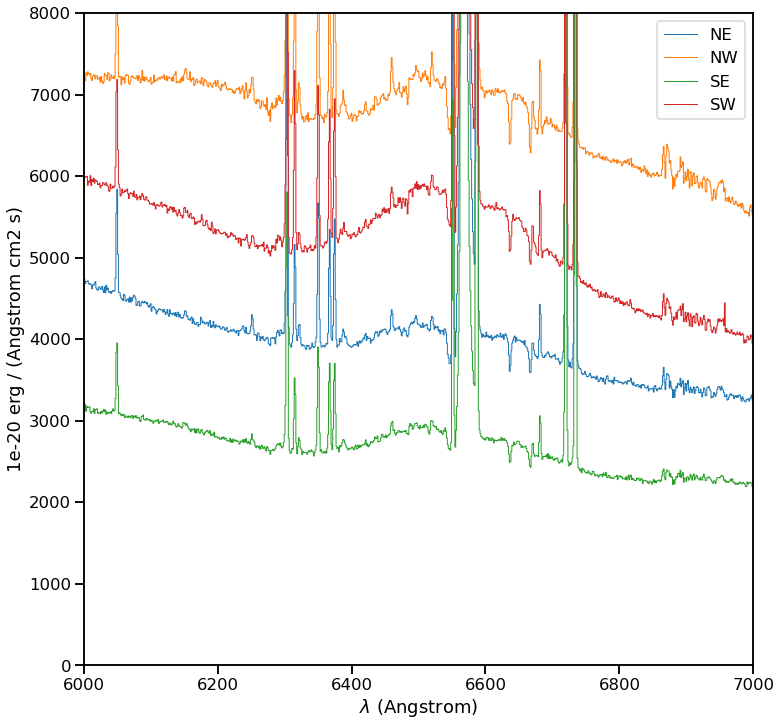

In [142]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_ne.plot(label="NE")
spec_nw.plot(label="NW")
spec_se.plot(label="SE")
spec_sw.plot(label="SW")
ax.legend()
ax.set(
    xlim=[6000, 7000],
    yscale="linear",
    ylim=[0, 8000],
);

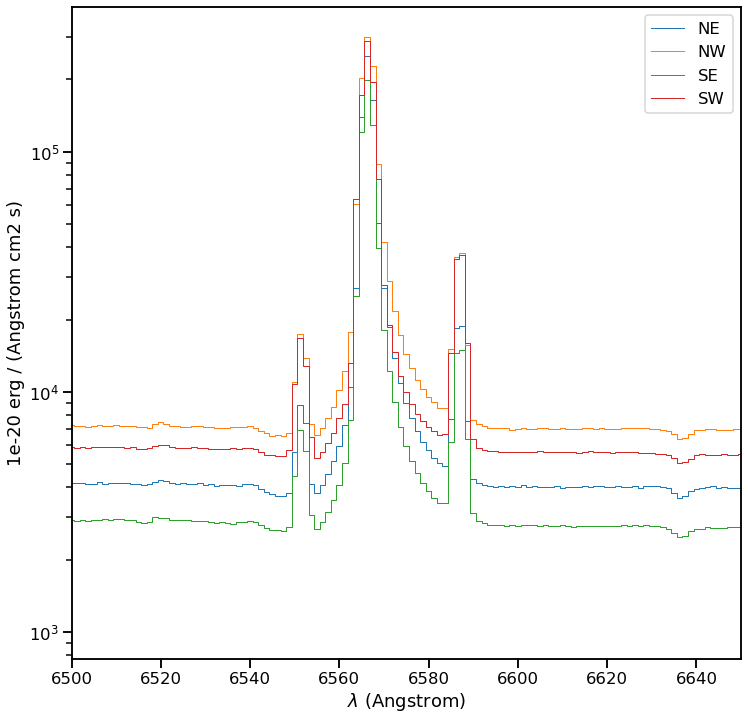

In [143]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_ne.plot(label="NE")
spec_nw.plot(label="NW")
spec_se.plot(label="SE")
spec_sw.plot(label="SW")
ax.legend()
ax.set(
    xlim=[6500, 6650],
    yscale="log",
    ylim=[None, None],
);

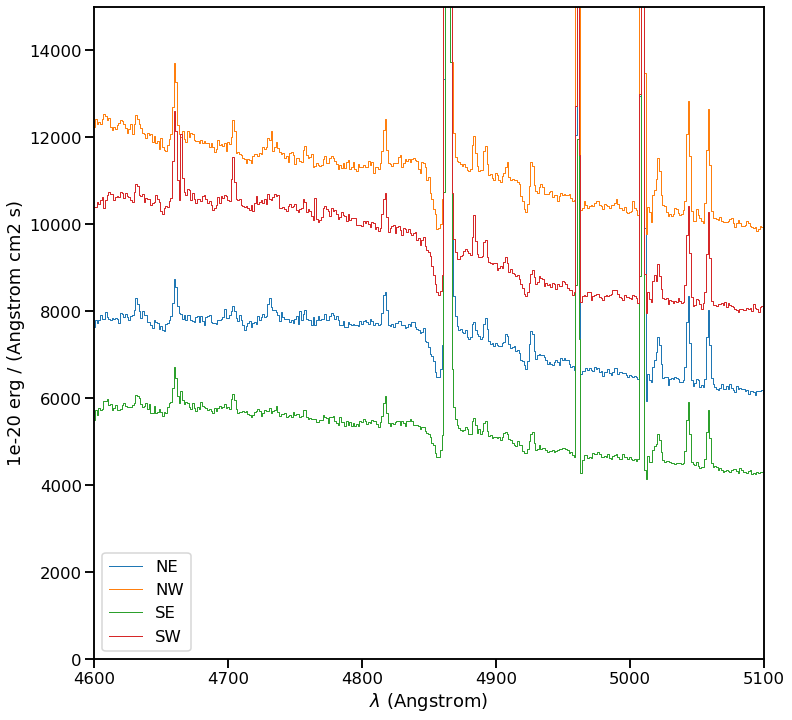

In [154]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_ne.plot(label="NE")
spec_nw.plot(label="NW")
spec_se.plot(label="SE")
spec_sw.plot(label="SW")
ax.legend()
ax.set(
    xlim=[4600, 5100],
    yscale="linear",
    ylim=[0, 15000],
);

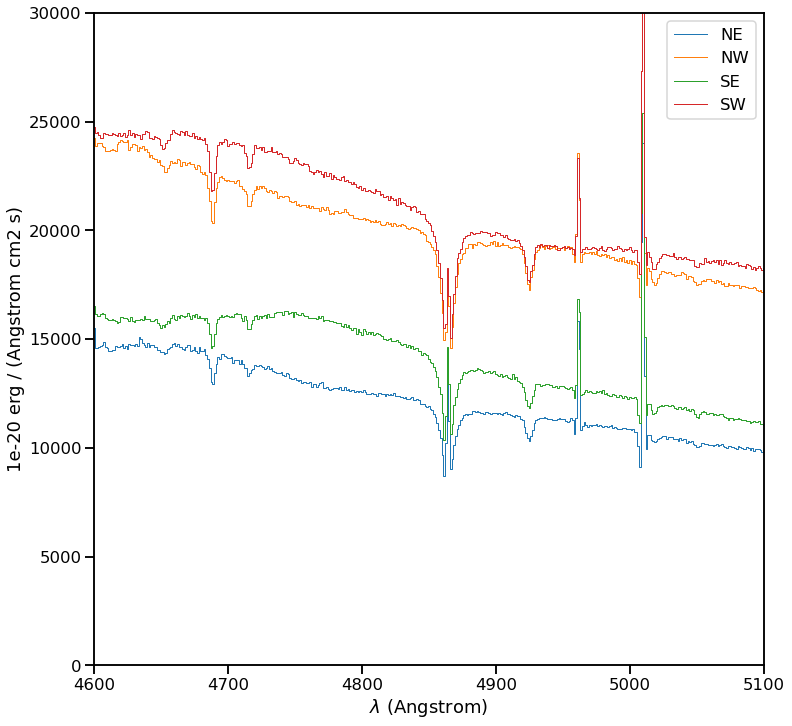

In [156]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_b_ne.plot(label="NE")
spec_b_nw.plot(label="NW")
spec_b_se.plot(label="SE")
spec_b_sw.plot(label="SW")
ax.legend()
ax.set(
    xlim=[4600, 5100],
    yscale="linear",
    ylim=[0, 30000],
);

In [147]:
spec_all = cube2.sum(axis=(1, 2))

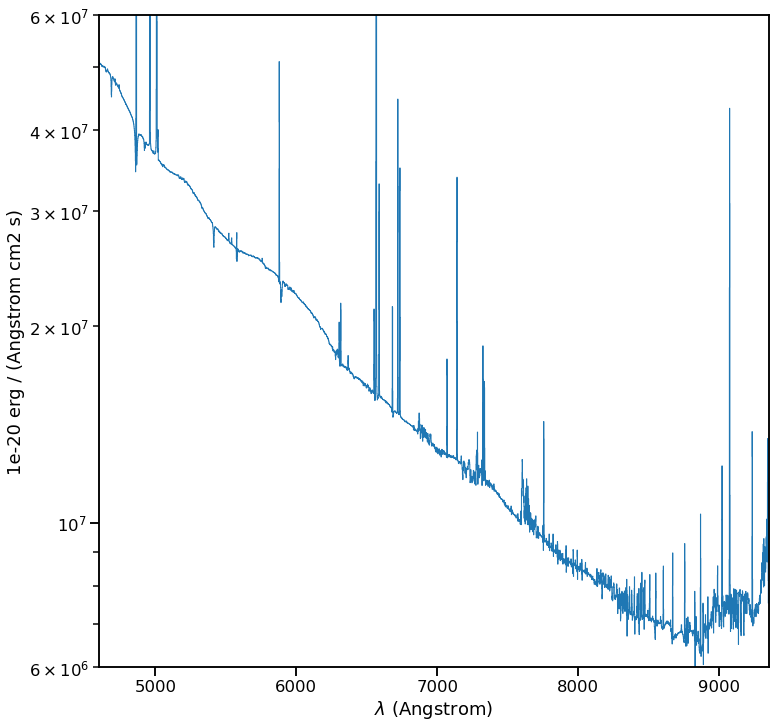

In [151]:
fig, ax = plt.subplots(figsize=(12, 12))
spec_all.plot()
ax.set(
    yscale="log",
    ylim=[6e6, 6e7],
);